In [16]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as plticker

# Import API key if needed later

In [3]:
# Load the CSV files
happiness_df = pd.read_csv("/Users/callistaswart/Projects/Project-1/Project1-Group1/happiness.csv")
un_df = pd.read_csv("/Users/callistaswart/Projects/Project-1/Project1-Group1/un_data.csv")

#rename column
happydf=happiness_df.rename(columns={"Country":"country","Happiness.Score":"Happiness Score"})
undf=un_df.rename(columns={"Forested area (% of land area)":"Forested Area Percentage"})

# Display sample data
undf.head()


,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested Area Percentage,CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
0,Afghanistan,SouthernAsia,652864,35530,54.4,106.3,20270,-2.4,623.2,23.3,...,8.3,42,2.1,9.8/0.3,63,5,78.2/47.0,45.1/27.0,21.43,-99
1,Albania,SouthernEurope,28748,2930,106.9,101.9,11541,2.6,3984.2,22.4,...,63.3,130,28.2,5.7/2.0,84,36,94.9/95.2,95.5/90.2,2.96,-99
2,Armenia,WesternAsia,29743,2930,102.9,88.8,10529,3.0,3489.1,19.0,...,58.2,114,11.7,5.5/1.8,48,46,100.0/100.0,96.2/78.2,3.17,-99
3,Azerbaijan,WesternAsia,86600,9828,118.9,99.3,53049,0.7,5438.7,6.7,...,77.0,97,13.5,37.5/3.9,2459,61,94.7/77.8,91.6/86.6,0.14,-99
4,Belize,CentralAmerica,22966,375,16.4,99.2,1721,1.2,4789.4,14.6,...,41.6,117,60.1,0.5/1.4,9,36,98.9/100.0,93.5/88.2,1.68,-99


In [4]:
combi_df=pd.merge(happydf,undf, how="inner", on="country")
combi_df.head()

,country,Happiness.Rank,Happiness Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,...,Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested Area Percentage,CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
0,Israel,11,7.213,7.279853,7.146146,1.375382,1.376290,0.838404,0.405989,0.330083,...,78.9,174,7.5,64.6/8.1,313,119,100.0/100.0,100.0/100.0,-99.00,-99
1,Costa Rica,12,7.079,7.168112,6.989888,1.109706,1.416404,0.759509,0.580132,0.214613,...,59.8,340,53.4,7.8/1.6,110,44,99.6/91.9,95.2/92.3,0.22,-99
2,United States,14,6.993,7.074657,6.911343,1.546259,1.419921,0.774287,0.505741,0.392579,...,74.6,1513,33.9,5254.3/16.2,83887,289,99.4/98.2,100.0/100.0,-99.00,-99
3,Chile,20,6.652,6.739251,6.564749,1.252785,1.284025,0.819480,0.376895,0.326662,...,64.3,197,23.4,82.6/4.7,540,85,99.7/93.3,100.0/90.9,0.02,-99
4,Brazil,22,6.635,6.725470,6.544531,1.107353,1.431306,0.616552,0.437454,0.162350,...,59.1,990,59.2,529.8/2.6,10948,61,100.0/87.0,88.0/51.5,0.06,-99


In [27]:
#remove non-percentage items
combi_df["Forested Clean"]=combi_df["Forested Area Percentage"].str.split("/").str[1]
#remove non-numbers
combi_df["Forested Clean"]=combi_df["Forested Clean"].str.extract(pat="(\d+)",expand=False)
#make it a float
combi_df["Forested Clean"]=combi_df["Forested Clean"].astype(float)
combi_df.head()


,country,Happiness.Rank,Happiness Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,...,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested Area Percentage,CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI),Forested Clean
0,Israel,11,7.213,7.279853,7.146146,1.375382,1.376290,0.838404,0.405989,0.330083,...,174,7.5,64.6/8.1,313,119,100.0/100.0,100.0/100.0,-99.00,-99,8.0
1,Costa Rica,12,7.079,7.168112,6.989888,1.109706,1.416404,0.759509,0.580132,0.214613,...,340,53.4,7.8/1.6,110,44,99.6/91.9,95.2/92.3,0.22,-99,1.0
2,United States,14,6.993,7.074657,6.911343,1.546259,1.419921,0.774287,0.505741,0.392579,...,1513,33.9,5254.3/16.2,83887,289,99.4/98.2,100.0/100.0,-99.00,-99,16.0
3,Chile,20,6.652,6.739251,6.564749,1.252785,1.284025,0.819480,0.376895,0.326662,...,197,23.4,82.6/4.7,540,85,99.7/93.3,100.0/90.9,0.02,-99,4.0
4,Brazil,22,6.635,6.725470,6.544531,1.107353,1.431306,0.616552,0.437454,0.162350,...,990,59.2,529.8/2.6,10948,61,100.0/87.0,88.0/51.5,0.06,-99,2.0


In [32]:
combi_df.columns

Index(['country', 'Happiness.Rank', 'Happiness Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual', 'Region',
       'Surface area (km2)', 'Population in thousands (2017)',
       'Population density (per km2, 2017)', 'Sex ratio (m per 100 f, 2017)',
       'GDP: Gross domestic product (million current US$)',
       'GDP growth rate (annual %, const. 2005 prices)',
       'GDP per capita (current US$)', 'Economy: Agriculture (% of GVA)',
       'Economy: Industry (% of GVA)',
       'Economy: Services and other activity (% of GVA)',
       'Employment: Agriculture (% of employed)',
       'Employment: Industry (% of employed)',
       'Employment: Services (% of employed)',
       'Unemployment (% of labour force)',
       'Labour force participation (female/male pop. %)',
       'Agricultural production index (2004-2006=100)',
       '

<function matplotlib.pyplot.show(close=None, block=None)>

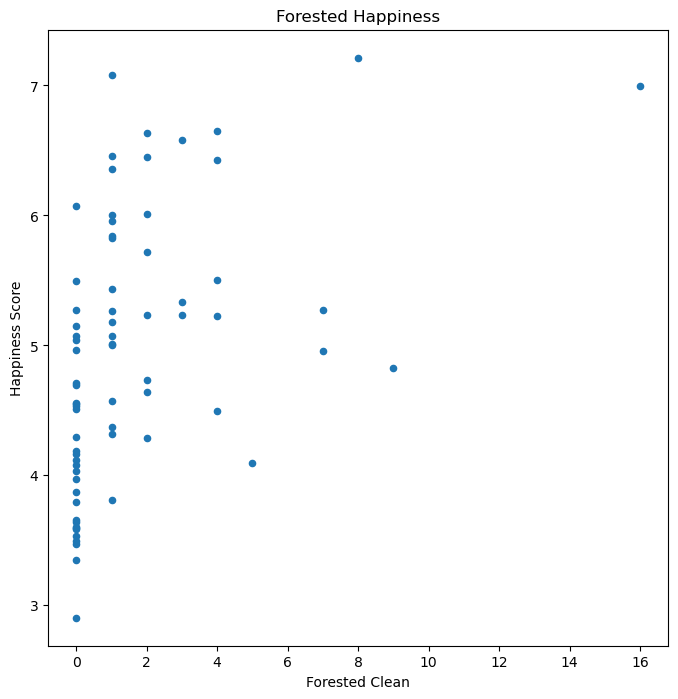

In [29]:
forestplot=combi_df.plot(kind="scatter",x="Forested Clean", y="Happiness Score", figsize=(8,8),title="Forested Happiness")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

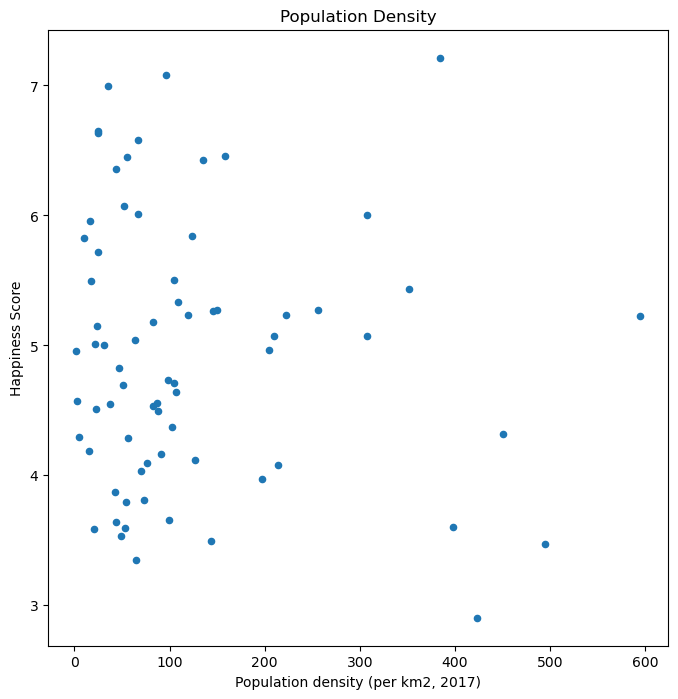

In [37]:
womenplot=combi_df.plot(kind="scatter",x="Population density (per km2, 2017)", y="Happiness Score", figsize=(8,8),title="Population Density")

plt.show